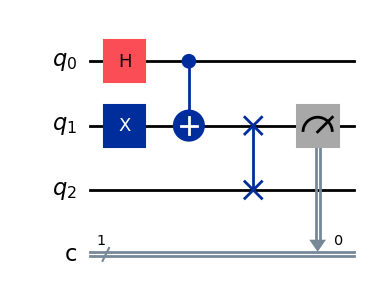

KeyError: 'statevector'

In [1]:
# quantum_circuit1.ipynb

from IPython.display import display
from qis102_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator

# Cell 1
qc = QuantumCircuit(3, 1)

# X gate on q1
qc.x(1)

# H gate on q0
qc.h(0)

# CNOT (CX) gate with control q0 and target q1
qc.cx(0, 1)

# SWAP gate between q1 and q2
qc.swap(1, 2)

# Measure q1 to c0
qc.measure(1, 0)

# The rest of the code remains unchanged

# Do not modify the following code
display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

# Extracting state vectors after each barrier
sv1 = result.data(0)["statevector"]
sv2 = result.data(1)["statevector"]
sv3 = result.data(2)["statevector"]
sv4 = result.data(3)["statevector"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))

counts = result.get_counts(qc)
display(plot_distribution(counts))


░ ┌───┐ ░       ░     ░    
q_0: ──────░─┤ H ├─░───■───░─────░────
     ┌───┐ ░ └───┘ ░ ┌─┴─┐ ░     ░ ┌─┐
q_1: ┤ X ├─░───────░─┤ X ├─░──X──░─┤M├
     └───┘ ░       ░ └───┘ ░  │  ░ └╥┘
q_2: ──────░───────░───────░──X──░──╫─
           ░       ░       ░     ░  ║ 
c: 1/═══════════════════════════════╩═
                                    0

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

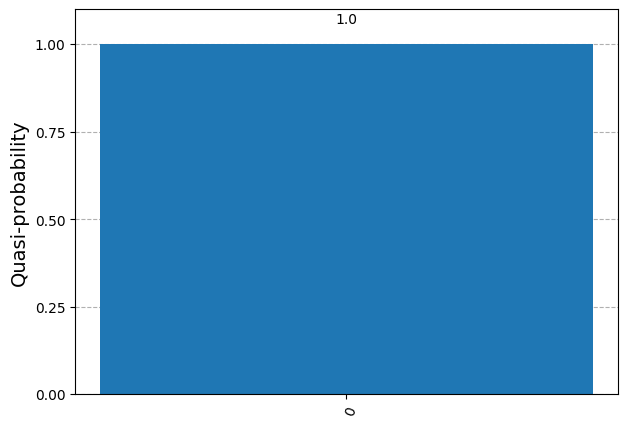

In [2]:
# This code was generated, improved and/or corrected with the assistance of ChatGPT4o and/or Claude 3.5.

from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from IPython.display import display
from qis102_utils import as_latex

# Create the full circuit
qc = QuantumCircuit(3, 1)
qc.x(1)
qc.barrier()  # sv1
qc.h(0)
qc.barrier()  # sv2
qc.cx(0, 1)
qc.barrier()  # sv3
qc.swap(1, 2)
qc.barrier()  # sv4
qc.measure(1, 0)

# Display the circuit
display(qc.draw(output="text"))

# Create circuits for each statevector
qc1 = QuantumCircuit(3)
qc1.x(1)
qc1.save_statevector()

qc2 = QuantumCircuit(3)
qc2.x(1)
qc2.h(0)
qc2.save_statevector()

qc3 = QuantumCircuit(3)
qc3.x(1)
qc3.h(0)
qc3.cx(0, 1)
qc3.save_statevector()

qc4 = QuantumCircuit(3)
qc4.x(1)
qc4.h(0)
qc4.cx(0, 1)
qc4.swap(1, 2)
qc4.save_statevector()

# Simulate and get statevectors
backend = AerSimulator()
sv1 = backend.run(qc1).result().get_statevector()
sv2 = backend.run(qc2).result().get_statevector()
sv3 = backend.run(qc3).result().get_statevector()
sv4 = backend.run(qc4).result().get_statevector()

# Display statevectors
display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))

# Run the full circuit for measurement results
result = backend.run(qc).result()
counts = result.get_counts(qc)
display(plot_distribution(counts))

# Cell 2

# 1.) Explain the results shown in Statevector 4
# 2.) Explain why is there a 100% chance of measuring only a value of 0 for the single classical bit?



## Explanation of Results:

### 1. Statevector 4:


### Initial State
- The initial state of the qubits is $ |000\rangle $, meaning all qubits are in the 0 state.

### sv1
- **X gate on $ q_1 $**:
  - The X gate (also known as a NOT gate) is applied to $ q_1 $. This flips the state of $ q_1 $ from 0 to 1.
  - The state of the system after this gate is $ |010\rangle $.

### sv2
- **H gate on $ q_0 $**:
  - The Hadamard (H) gate is applied to $ q_0 $. The H gate creates a superposition, changing the state of $ q_0 $ from $ |0\rangle $ to $ \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $.
  - The state of the system after this gate is $ \frac{1}{\sqrt{2}}(|010\rangle + |110\rangle) $.

### sv3
- **CNOT (CX) gate with $ q_0 $ as control and $ q_1 $ as target**:
  - The CNOT gate flips the state of the target qubit ($ q_1 $) if the control qubit ($ q_0 $) is in state 1.
  - The state of the system after this gate is $ \frac{1}{\sqrt{2}}(|010\rangle + |100\rangle) $.

### sv4
- **SWAP gate between $ q_1 $ and $ q_2 $**:
  - The SWAP gate exchanges the states of $ q_1 $ and $ q_2 $.
  - The state of the system after this gate is $ \frac{1}{\sqrt{2}}(|000\rangle + |101\rangle) $.

- **Measurement of $ q_2 $**:
  - The measurement gate measures the state of $ q_2 $ and stores the result in the classical bit $ c $.
  - Given the state $ \frac{1}{\sqrt{2}}(|000\rangle + |101\rangle) $, measuring $ q_2 $ will always yield 0 because $ q_2 $ is 0 in both terms of the superposition. Hence, the classical bit $ c $ will be set to 0 with 100% probability.

### 2. 100% Chance of Measuring a Value of 0 for the Single Classical Bit:

- The circuit starts by flipping $ q_1 $ with an X gate.
- It then puts $ q_0 $ into superposition with an H gate.
- A CNOT gate entangles $ q_0 $ and $ q_1 $.
- A SWAP gate exchanges the states of $ q_1 $ and $ q_2 $.
- Finally, $ q_2 $ is measured, and the result is stored in the classical bit $ c $.

The measurement result is deterministic because, after the SWAP gate, $ q_2 $ is always in the state 0, leading to a 100% probability of measuring 0.


